In [ ]:
!unzip "/content/digit-recognizer.zip"

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


load dataset

visualize

divide data into x and y

divide into train and test

apply ml and eval

apply single layer perceptron eval

apply multi layer perceptron eval

deeplearning using tensorflow and keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import Perceptron

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


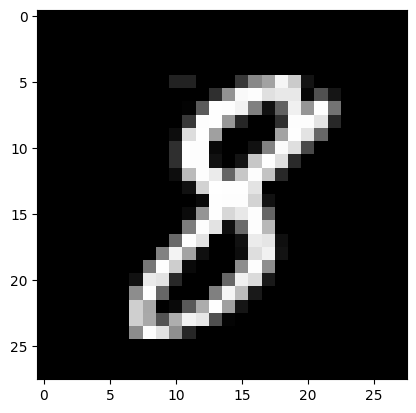

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
row_to_ex=20
img_data = np.reshape(train[features][row_to_ex:row_to_ex+1].to_numpy(),(28,28))
_ = plt.imshow(img_data,cmap="gray")

In [ ]:
x = train.drop('label',axis=1)
y = train['label']

In [ ]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
rf=RandomForestClassifier(max_depth=3)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print("accuracy score",round(acc_score,2))
  print(conf_matrix)
  print(class_rep)

In [ ]:
model_eval(y_train, y_hat_train_rf)

accuracy score 0.75
[[3240    2    7   19    2    0   34    9   23    0]
 [   1 3690    6    7    2    2    2   19    4    5]
 [ 141  504 2202   94   35    1  134  168   38    4]
 [ 118  255   65 2788   19   17   17  106   58   52]
 [  36   49   15   17 2497    1  143  156   24  308]
 [ 314  264   16 1221  101  693  110   88   68  147]
 [ 166  155   44   55   35    5 2838   40   12    0]
 [  62  140   62    9   51    0    3 3119   23   63]
 [  31  523   54  334   42    7   89   52 1986  109]
 [  41   72   19   92  363    1   38  457   31 2219]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      3336
           1       0.65      0.99      0.79      3738
           2       0.88      0.66      0.76      3321
           3       0.60      0.80      0.69      3495
           4       0.79      0.77      0.78      3246
           5       0.95      0.23      0.37      3022
           6       0.83      0.85      0.84      3350
           7    

In [ ]:
model_eval(y_test, y_hat_test_rf)

accuracy score 0.75
[[772   3   2   1   0   0  10   2   6   0]
 [  1 936   1   3   0   0   1   3   1   0]
 [ 31 132 560  11  11   1  53  44  13   0]
 [ 39  52  18 699  10   3   5  16   6   8]
 [  8  13   7   5 629   0  43  49   4  68]
 [ 84  80   4 304  34 176  23  17  17  34]
 [ 46  49   4  11  13   4 654   6   0   0]
 [ 12  30  13   2  18   0   0 778   7   9]
 [  8 155  17  75  17   0  30   8 494  32]
 [  8  19   4  22  91   1   6 129   8 567]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       796
           1       0.64      0.99      0.78       946
           2       0.89      0.65      0.75       856
           3       0.62      0.82      0.70       856
           4       0.76      0.76      0.76       826
           5       0.95      0.23      0.37       773
           6       0.79      0.83      0.81       787
           7       0.74      0.90      0.81       869
           8       0.89      0.59      0.71       836
        

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_hat_train_logreg=log_reg.predict(x_train)
y_hat_test_logreg=log_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_eval(y_train,y_hat_train_logreg)

accuracy score 0.94
[[3274    0    5    3    5   14   16    4   12    3]
 [   0 3662   11   14    1    7    3    6   28    6]
 [   7   21 3076   45   30   14   23   28   62   15]
 [   5    7   60 3214    2   97    8   22   58   22]
 [   5   12   15    1 3076    2   19    8   21   87]
 [  26    8   28   96   30 2693   35    7   73   26]
 [  24    5   18    1   17   27 3246    1   10    1]
 [   5   12   40   12   18    3    2 3339    8   93]
 [  15   48   23   75   11   65   15   10 2936   29]
 [  12    8    8   32   70   18    0   85   24 3076]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3336
           1       0.97      0.98      0.97      3738
           2       0.94      0.93      0.93      3321
           3       0.92      0.92      0.92      3495
           4       0.94      0.95      0.95      3246
           5       0.92      0.89      0.90      3022
           6       0.96      0.97      0.97      3350
           7    

In [ ]:
model_eval(y_test,y_hat_test_logreg)

accuracy score 0.92
[[762   0   2   3   4   5  12   1   6   1]
 [  0 924   5   5   1   1   0   3   6   1]
 [  4   9 769  17  12   2  12   6  21   4]
 [  7   2  20 770   0  27   2   9  14   5]
 [  1   2   7   2 778   1   5   3   4  23]
 [  8   2  10  23   4 660  13   3  43   7]
 [  4   2   8   1   6  10 751   1   4   0]
 [  4   1  10   8   7   3   1 805   3  27]
 [  3  15  17  33   4  24  10   4 711  15]
 [  2   0   2  17  25   2   0  30   8 769]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       796
           1       0.97      0.98      0.97       946
           2       0.90      0.90      0.90       856
           3       0.88      0.90      0.89       856
           4       0.93      0.94      0.93       826
           5       0.90      0.85      0.88       773
           6       0.93      0.95      0.94       787
           7       0.93      0.93      0.93       869
           8       0.87      0.85      0.86       836
        

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
per = Perceptron()
per.fit(x_train , y_train)

Perceptron()

In [ ]:
y_hat_train_per = per.predict(x_train)
y_hat_test_per = per.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_per)

accuracy score 0.89
[[3245    0    8    3    5    5   35    0   34    1]
 [   0 3661   13    3    3    2    6    3   42    5]
 [  13   53 2871   25   31    5  125   32  157    9]
 [  13   39  131 2889   16   38   57   25  247   40]
 [   4   14   10    0 3035    7   50    8   54   64]
 [  28   27   19  193   50 2188  198   11  272   36]
 [  14    6    2    0   10   16 3288    0   14    0]
 [  12   22   43    3   48    4    5 3214   39  142]
 [  18   97   25   36   37   75   51   10 2841   37]
 [  19   15   21   29  263   41    6  138  137 2664]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3336
           1       0.93      0.98      0.95      3738
           2       0.91      0.86      0.89      3321
           3       0.91      0.83      0.87      3495
           4       0.87      0.93      0.90      3246
           5       0.92      0.72      0.81      3022
           6       0.86      0.98      0.92      3350
           7    

In [ ]:
model_eval(y_test , y_hat_test_per)

accuracy score 0.88
[[766   0   1   3   4   1  11   0   9   1]
 [  0 930   3   1   1   0   2   1   8   0]
 [  6  23 703   8  11   3  41  14  46   1]
 [  6   4  35 711   4  17  17   6  48   8]
 [  2   3   8   1 768   2  13   2  12  15]
 [  3  11   3  49  12 543  47   4  88  13]
 [  4   1   1   0   2   3 770   1   5   0]
 [  7   5  12   5  15   4   0 781  15  25]
 [  6  25   8   8   8  26  22   5 718  10]
 [  4   4   4  16  55   6   0  45  39 682]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       796
           1       0.92      0.98      0.95       946
           2       0.90      0.82      0.86       856
           3       0.89      0.83      0.86       856
           4       0.87      0.93      0.90       826
           5       0.90      0.70      0.79       773
           6       0.83      0.98      0.90       787
           7       0.91      0.90      0.90       869
           8       0.73      0.86      0.79       836
        

MUlti layer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes = (64,64,64), random_state = 10, verbose = 1)
mlp.fit(x_train,y_train)
y_hat_train_mlp = mlp.predict(x_train)
y_hat_test_mlp = mlp.predict(x_test)

Iteration 1, loss = 2.92790823
Iteration 2, loss = 0.61130416
Iteration 3, loss = 0.38984193
Iteration 4, loss = 0.29756884
Iteration 5, loss = 0.24079396
Iteration 6, loss = 0.19795728
Iteration 7, loss = 0.16671323
Iteration 8, loss = 0.15004896
Iteration 9, loss = 0.13379428
Iteration 10, loss = 0.11437175
Iteration 11, loss = 0.10237632
Iteration 12, loss = 0.08855856
Iteration 13, loss = 0.08247361
Iteration 14, loss = 0.08460366
Iteration 15, loss = 0.07807670
Iteration 16, loss = 0.06959152
Iteration 17, loss = 0.07807428
Iteration 18, loss = 0.07039426
Iteration 19, loss = 0.06856918
Iteration 20, loss = 0.05882026
Iteration 21, loss = 0.05527884
Iteration 22, loss = 0.05911925
Iteration 23, loss = 0.06163009
Iteration 24, loss = 0.05482740
Iteration 25, loss = 0.06275743
Iteration 26, loss = 0.04681039
Iteration 27, loss = 0.04495617
Iteration 28, loss = 0.04678297
Iteration 29, loss = 0.05041975
Iteration 30, loss = 0.04576628
Iteration 31, loss = 0.06041460
Iteration 32, los

In [ ]:
model_eval(y_hat_train_mlp,y_train)

accuracy score 0.99
[[3327    0    0    0    1    0    3    0    5    0]
 [   1 3736    1    1    1    0    0    2    4    1]
 [   0    0 3315    9    7    0    1    3    4    9]
 [   0    0    1 3462    2    8    1    0    8    5]
 [   1    0    0    0 3215    1    2    2    1   11]
 [   1    0    0    0    0 3000    1    0    0    1]
 [   2    1    0    0    1    2 3339    0    0    0]
 [   1    1    2    9    1    0    0 3515    1   13]
 [   3    0    2   12    4   10    3    0 3204   10]
 [   0    0    0    2   14    1    0   10    0 3283]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3747
           2       1.00      0.99      0.99      3348
           3       0.99      0.99      0.99      3487
           4       0.99      0.99      0.99      3233
           5       0.99      1.00      1.00      3003
           6       1.00      1.00      1.00      3345
           7    

In [ ]:
model_eval(y_hat_test_mlp,y_test)

accuracy score 0.96
[[780   0   1   2   1   6   8   0   3   1]
 [  1 934   0   2   1   1   1   3   7   0]
 [  1   3 830  15   3   2   0  12  15   4]
 [  0   0   2 809   1  15   0   4  11  10]
 [  0   2   3   0 795   2   0   6   1  17]
 [  1   2   0   8   1 721   1   2   6   2]
 [  5   0   5   0   4  12 773   0   5   0]
 [  1   2   7   2   1   0   0 836   3  15]
 [  4   3   8  15   3  12   4   0 781   5]
 [  3   0   0   3  16   2   0   6   4 801]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       802
           1       0.99      0.98      0.99       950
           2       0.97      0.94      0.95       885
           3       0.95      0.95      0.95       852
           4       0.96      0.96      0.96       826
           5       0.93      0.97      0.95       744
           6       0.98      0.96      0.97       804
           7       0.96      0.96      0.96       867
           8       0.93      0.94      0.93       835
        

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical

In [ ]:
x.shape

(42000, 784)

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test_ohe

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train_ohe,epochs=100,batch_size=128,validation_data=(x_test,y_test_ohe))

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6225 - loss: 12.4016 - val_accuracy: 0.8840 - val_loss: 0.4589
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8340 - loss: 0.7129 - val_accuracy: 0.9169 - val_loss: 0.3042
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8827 - loss: 0.4358 - val_accuracy: 0.9325 - val_loss: 0.2526
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9074 - loss: 0.3391 - val_accuracy: 0.9407 - val_loss: 0.2051
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9210 - loss: 0.2858 - val_accuracy: 0.9465 - val_loss: 0.1939
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9298 - loss: 0.2420 - val_accuracy: 0.9489 - val_loss: 0.1780
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9366 - loss: 0.2161 - val_accuracy: 0.9511 - val_loss: 0.1734
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9428 - loss: 0.1991 -

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

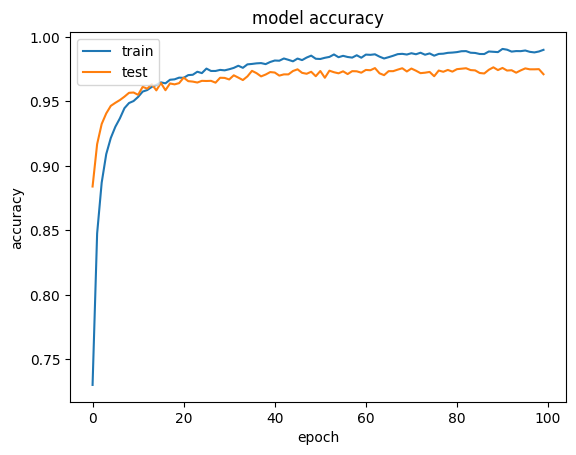

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

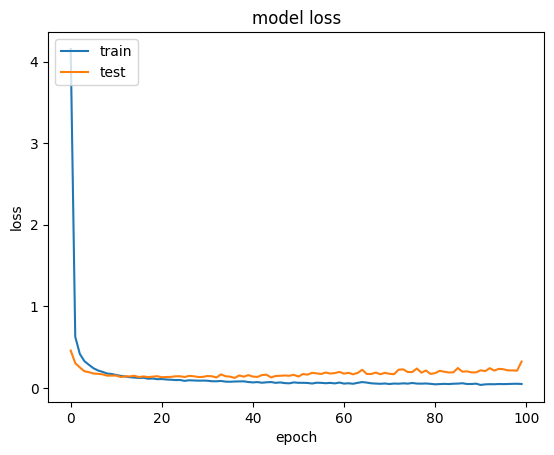

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [ ]:
y_hat_train_dense = np.argmax(model.predict(x_train),axis=1)
y_hat_test_dense = np.argmax(model.predict(x_test),axis=1)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
y_hat_test_dense

array([7, 3, 9, ..., 6, 4, 1])

In [ ]:
model_eval(y_train,y_hat_train_dense)

accuracy score 1.0
[[3316    0    0    0    0    0   12    0    8    0]
 [   0 3735    0    0    0    0    0    1    2    0]
 [   0    0 3308    0    1    0    1    2    9    0]
 [   0    2    4 3435    0   28    0    0   14   12]
 [   0    1    0    0 3240    0    0    0    1    4]
 [   0    0    0    0    0 3016    5    0    1    0]
 [   0    0    0    0    0    1 3348    0    1    0]
 [   0    1    1    0    0    0    0 3526    0    4]
 [   0    1    0    1    0    4    6    0 3214    1]
 [   1    0    0    1    1    4    0    2   11 3313]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3336
           1       1.00      1.00      1.00      3738
           2       1.00      1.00      1.00      3321
           3       1.00      0.98      0.99      3495
           4       1.00      1.00      1.00      3246
           5       0.99      1.00      0.99      3022
           6       0.99      1.00      1.00      3350
           7     

In [ ]:
model_eval(y_test,y_hat_test_dense)

accuracy score 0.97
[[773   0   1   1   0   1   9   3   7   1]
 [  0 937   2   1   1   0   0   3   2   0]
 [  0   5 827   1   3   0   2   8  10   0]
 [  0   0   4 820   0  19   1   2   8   2]
 [  0   2   0   0 812   0   4   2   3   3]
 [  0   1   0   2   0 756   7   1   4   2]
 [  2   4   0   0   2   3 774   0   2   0]
 [  0   4   5   1   2   2   0 847   2   6]
 [  0  13   2   6   1   8  11   3 788   4]
 [  0   0   0   3   8   9   0   4   8 823]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       796
           1       0.97      0.99      0.98       946
           2       0.98      0.97      0.97       856
           3       0.98      0.96      0.97       856
           4       0.98      0.98      0.98       826
           5       0.95      0.98      0.96       773
           6       0.96      0.98      0.97       787
           7       0.97      0.97      0.97       869
           8       0.94      0.94      0.94       836
        